<a href="https://colab.research.google.com/github/amania03/DS2002Homeworks/blob/main/sqliteHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     88
7       Carol     White  English     79
8       Carol     White  History     92
9       David     Brown     Math     70
10      David     Brown  English     85
11      David     Brown  History     78
12        Eve     Davis     Math     93
13        Eve     Davis  English     89
14        Eve     Davis  History     91


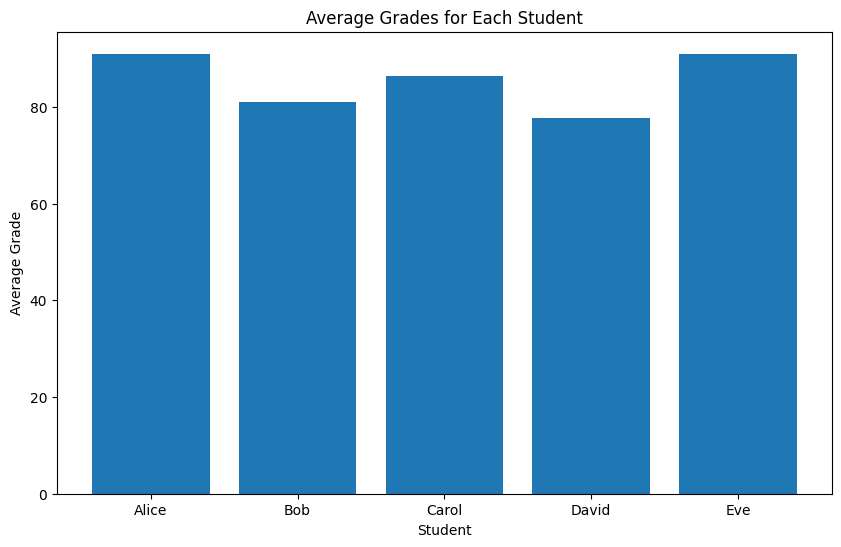

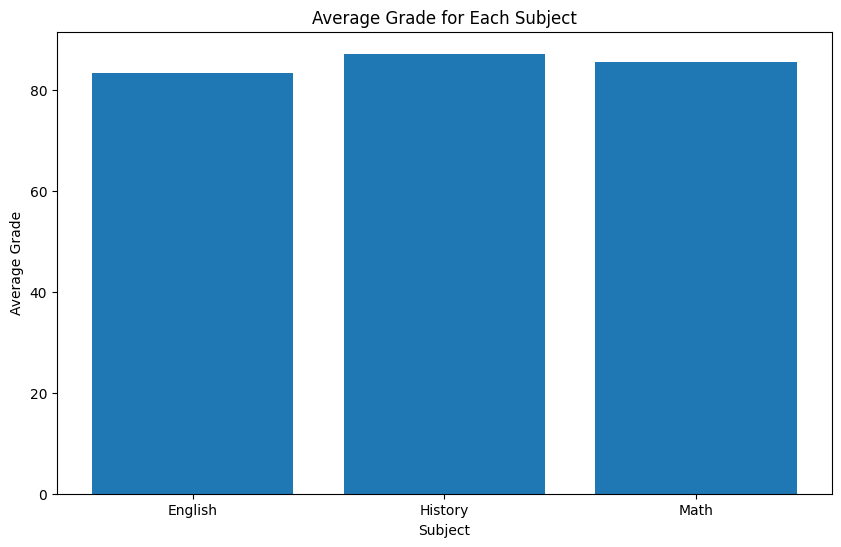

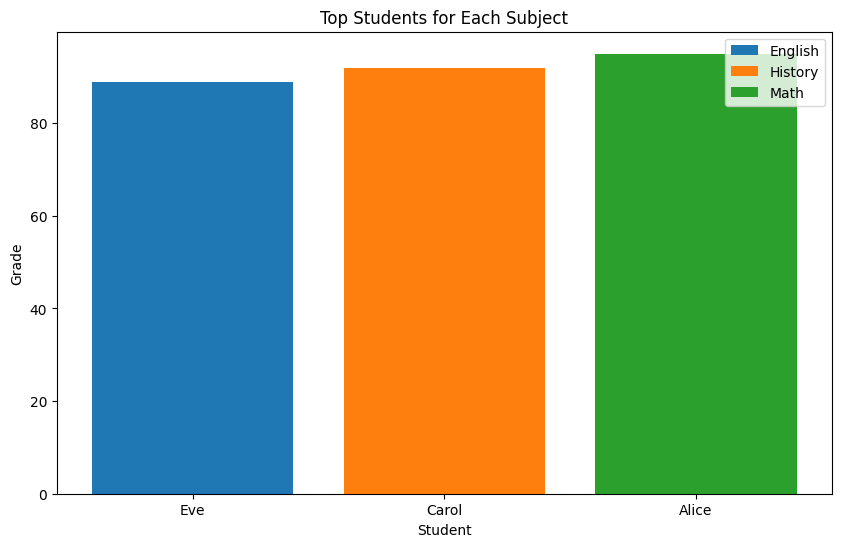

In [1]:


# Importing necessary libraries
from google.colab import files  # To download files if needed
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Setting Up the Database

# Create a connection to SQLite database (student_grades.db)
conn = sqlite3.connect('student_grades.db')

# Create a cursor object
cur = conn.cursor()

# 2. Create the Necessary Tables

# Create students table
cur.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT
    )
''')

# Create grades table
cur.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT,
        grade INTEGER,
        FOREIGN KEY (student_id) REFERENCES students (student_id)
    )
''')

# Commit the changes
conn.commit()

# 3. Insert Data into the Tables

# Insert students data
cur.executemany('''
    INSERT INTO students (first_name, last_name)
    VALUES (?, ?)''', [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
])

# Insert grades data
cur.executemany('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (?, ?, ?)''', [
    (1, 'Math', 95), (1, 'English', 88), (1, 'History', 90),
    (2, 'Math', 82), (2, 'English', 76), (2, 'History', 85),
    (3, 'Math', 88), (3, 'English', 79), (3, 'History', 92),
    (4, 'Math', 70), (4, 'English', 85), (4, 'History', 78),
    (5, 'Math', 93), (5, 'English', 89), (5, 'History', 91)
])

# Commit the changes
conn.commit()

# 4. Perform SQL Queries

# 1. Retrieve all students' names and their grades
cur.execute('''
    SELECT first_name, last_name, subject, grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''')
students_grades = cur.fetchall()

# 2. Find the average grade for each student
cur.execute('''
    SELECT first_name, last_name, AVG(grade) AS avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')
average_grades = cur.fetchall()

# 3. Find the student with the highest average grade
cur.execute('''
    SELECT first_name, last_name, AVG(grade) AS avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY avg_grade DESC
    LIMIT 1
''')
top_student = cur.fetchone()

# 4. Find the average grade for Math
cur.execute('''
    SELECT AVG(grade)
    FROM grades
    WHERE subject = 'Math'
''')
average_math_grade = cur.fetchone()

# 5. List all students who scored above 90 in any subject
cur.execute('''
    SELECT first_name, last_name, subject, grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grade > 90
''')
top_students = cur.fetchall()

# 5. Load Data into Pandas

# Load students table into DataFrame
students_df = pd.read_sql_query("SELECT * FROM students", conn)

# Load grades table into DataFrame
grades_df = pd.read_sql_query("SELECT * FROM grades", conn)

# Combine the data from both tables using JOIN
combined_df = pd.read_sql_query('''
    SELECT first_name, last_name, subject, grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', conn)

# Display combined DataFrame
print(combined_df)

# 6. Visualize the Data with Matplotlib

# 1. Plot the average grades for each student
avg_grades_df = pd.read_sql_query('''
    SELECT first_name, last_name, AVG(grade) AS avg_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''', conn)

plt.figure(figsize=(10, 6))
plt.bar(avg_grades_df['first_name'], avg_grades_df['avg_grade'])
plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.show()

# 2. Bar chart showing average grade for each subject
subject_avg_df = pd.read_sql_query('''
    SELECT subject, AVG(grade) AS avg_grade
    FROM grades
    GROUP BY subject
''', conn)

plt.figure(figsize=(10, 6))
plt.bar(subject_avg_df['subject'], subject_avg_df['avg_grade'])
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.show()

# Bonus Task: Find the student with the highest grade in each subject
top_per_subject_df = pd.read_sql_query('''
    SELECT first_name, last_name, subject, MAX(grade) AS max_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY subject
''', conn)

# Visualize the results using a grouped bar chart
plt.figure(figsize=(10, 6))
for subject in top_per_subject_df['subject'].unique():
    subject_df = top_per_subject_df[top_per_subject_df['subject'] == subject]
    plt.bar(subject_df['first_name'], subject_df['max_grade'], label=subject)

plt.title('Top Students for Each Subject')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Close the connection
conn.close()


# This code was created with the assistance of ChatGPT and stack overflow